# Naive Bayes (Bayes)

**author** : Germain Forestier (germain.forestier@uha.fr)

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. They are particularly known for their efficiency in text classification tasks.


## **Exercice 1**: Naive Bayes using Scikit-learn

This exercise will guide you through implementing a Naive Bayes classifier using Python and Scikit-learn. You'll learn to handle data loading, preprocessing, training a model, and evaluating its performance.

### Part 1: Data Loading

In [ ]:
# Import the necessary library
import pandas as pd

# TODO: Load the dataset from the provided URL into a DataFrame named 'data'
# Hint: Use pd.read_csv() with the URL https://germain-forestier.info/dataset/weather.csv

# TODO: Display the first few rows of the dataset


 #### Correction :

In [ ]:
# Import the necessary library
import pandas as pd

# Load the dataset from the provided URL into a DataFrame named 'data'
data = pd.read_csv('https://germain-forestier.info/dataset/weather.csv')

# Display the first few rows of the dataset
print(data.head())


    Outlook Temperature Humidity    Wind Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes


### Part 2: Data Preprocessing

In [ ]:
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
encoder = LabelEncoder()

# TODO: Apply the encoder to each categorical column and replace the column with encoded data
# Example: data['Outlook'] = encoder.fit_transform(data['Outlook'])

# TODO: Display the transformed data


 #### Correction :

In [ ]:
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
encoder = LabelEncoder()

# Apply the encoder to each categorical column and replace the column with encoded data
for column in data.columns:
    data[column] = encoder.fit_transform(data[column])

# Display the transformed data
print(data.head())


   Outlook  Temperature  Humidity  Wind  Play
0        2            1         0     1     0
1        2            1         0     0     0
2        0            1         0     1     1
3        1            2         0     1     1
4        1            0         1     1     1


### Part 3: Splitting the Data

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data.drop('Play', axis=1)  # Features
y = data['Play']               # Target

# TODO: Split the data into training and testing sets with a test size of 20% and random_state=42


 #### Correction :

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data.drop('Play', axis=1)  # Features
y = data['Play']               # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

# Display the size of the training set and test set
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')


Training set size: 13 samples
Test set size: 1 samples


### Part 4: Training the Naive Bayes Model

In [ ]:
# Import CategoricalNB from sklearn
from sklearn.naive_bayes import CategoricalNB

# Initialize the Categorical Naive Bayes classifier
model = CategoricalNB()

# TODO: Train the model using the training data


 #### Correction :

In [ ]:
# Import CategoricalNB from sklearn
from sklearn.naive_bayes import CategoricalNB

# Initialize the Categorical Naive Bayes classifier
model = CategoricalNB()

# Train the model using the training data
model.fit(X_train, y_train)

# Display a message when training is complete
print("Model training complete using CategoricalNB.")


Model training complete using CategoricalNB.


### Part 5: Model Evaluation

In [ ]:
# Import accuracy_score and confusion_matrix from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix

# TODO: Make predictions on the test set and store in a variable 'predictions'

# TODO: Calculate and print the accuracy of the model

# TODO: Generate and display the confusion matrix


 #### Correction :

In [ ]:
# Import accuracy_score and confusion_matrix from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model accuracy: {accuracy * 100:.2f}%')

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Model accuracy: 100.00%
Confusion Matrix:
[[1]]


## **Exercise** 2: Text Classification using Multinomial Naive Bayes

This exercise introduces students to text classification using the Multinomial Naive Bayes classifier, a popular algorithm for text data that involves word counts as features. We will work with the 20 Newsgroups dataset, focusing on a subset of categories.

### Part 1: Data Overview

Before diving into text classification, it's crucial to understand the dataset you'll be working with. The 20 Newsgroups dataset is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. In this part, you'll load the dataset and explore the different categories available, which will help you become familiar with the type of text data you'll classify.


In [ ]:
# Import necessary library to fetch data
from sklearn.datasets import fetch_20newsgroups

# TODO: Load data using fetch_20newsgroups and display the target names (categories)

 #### Correction :

In [ ]:
# Import necessary library to fetch data
from sklearn.datasets import fetch_20newsgroups

# Load data
data = fetch_20newsgroups()
print(data.target_names)


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### Part 2: Selecting Specific Categories

Often, you may not need all the data available in a dataset for your specific task. For this exercise, we'll focus on a subset of categories to simplify the learning process and reduce computation time. You will learn how to fetch data for selected categories only.


In [ ]:
# Define the categories to focus on
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

# TODO: Fetch the training and testing data for the selected categories


 #### Correction :

In [ ]:
# Define the categories to focus on
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

# Fetch the training and testing data for the selected categories
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


### Part 3: Text Vectorization and Model Training

Text data must be converted into a numerical format that machine learning models can understand. Using the TF-IDF vectorization, you will convert text documents into a matrix of TF-IDF features. Then, you will use these features to train a Multinomial Naive Bayes model, which is especially suited for text classification tasks where features represent word counts or frequencies.


In [ ]:
# Import necessary libraries for text vectorization and Naive Bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# TODO: Create a pipeline that includes TfidfVectorizer and MultinomialNB

# TODO: Train the model with the training data


 #### Correction :

In [ ]:
# Import necessary libraries for text vectorization and Naive Bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Create a pipeline that includes TfidfVectorizer and MultinomialNB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model with the training data
model.fit(train.data, train.target)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

### Part 4: Evaluating the Model

After training a model, it's crucial to evaluate its performance to understand how well it performs on unseen data. In this part, you will use the test data to make predictions and then visualize the results using a confusion matrix. This will allow you to see not only the overall accuracy but also where the model makes mistakes.


In [ ]:
# Import necessary library for evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Predict labels for the test data

# TODO: Generate and visualize the confusion matrix using seaborn's heatmap


 #### Correction :

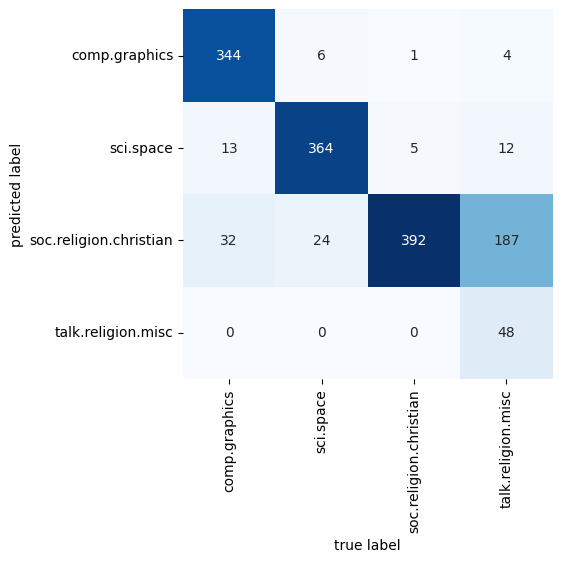

In [ ]:
# Import necessary library for evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test data
labels = model.predict(test.data)

# Generate and visualize the confusion matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()


### Part 5: Using the Model for Prediction

Now that the model is trained and evaluated, we can use it to predict the category of any new piece of text. This functionality is extremely useful in many applications, such as sorting emails, organizing documents, and moderating content. Below is a utility function that predicts the category of a given text string using our trained Multinomial Naive Bayes pipeline.


In [ ]:
# Utility function to predict the category of a text
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

# Test the function with some example strings
print(predict_category('Meeting to discuss the launch of the new space satellite.'))
print(predict_category('Join us this Sunday for the church anniversary service.'))
print(predict_category('How to dertermine the screen resolution!'))



sci.space
soc.religion.christian
comp.graphics


## **Exercise** 3: Advanced Model Optimization and Comparison

This exercise will go deeper into Bayes classification and will explore advanced model optimization and comparisons.

### Part 1: Feature Engineering with N-Grams

Introducing N-Grams into our feature set allows the model to consider the context provided by adjacent word sequences, potentially increasing its predictive accuracy. You will modify the TfidfVectorizer to include not only single words (uni-grams) but also sequences of two and three words (bi-grams and tri-grams).


In [ ]:
# Import necessary libraries for the classifier and vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# TODO: Create a TfidfVectorizer with ngram_range set to include uni-grams, bi-grams, and tri-grams
# TODO: Integrate this vectorizer into a pipeline with the MultinomialNB classifier

# Train the model with the training data
# model_ngram.fit(train.data, train.target)

# Evaluate the model on the test set
# predictions = model_ngram.predict(test.data)
# print(classification_report(test.target, predictions, target_names=train.target_names))


 #### Correction :

In [ ]:
# Import necessary libraries for the classifier and vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Create a TfidfVectorizer with ngram_range set to include uni-grams, bi-grams, and tri-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Integrate this vectorizer into a pipeline with the MultinomialNB classifier
model_ngram = make_pipeline(vectorizer, MultinomialNB())

# Train the model with the training data
model_ngram.fit(train.data, train.target)

# Evaluate the model on the test set
predictions = model_ngram.predict(test.data)
print(classification_report(test.target, predictions, target_names=train.target_names))


                        precision    recall  f1-score   support

         comp.graphics       0.97      0.83      0.89       389
             sci.space       0.91      0.91      0.91       394
soc.religion.christian       0.63      0.98      0.77       398
    talk.religion.misc       0.99      0.30      0.46       251

              accuracy                           0.80      1432
             macro avg       0.87      0.76      0.76      1432
          weighted avg       0.86      0.80      0.79      1432



### Part 2: Comparing Different Naive Bayes Models

Different types of Naive Bayes classifiers are suitable for different types of data. You will now explore how Bernoulli Naive Bayes, which is designed for binary/boolean features, performs on our text data compared to Multinomial Naive Bayes.


In [ ]:
# Import necessary libraries for the classifier and vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# TODO: Create a pipeline with TfidfVectorizer set to binary mode and BernoulliNB
# TODO: Train and evaluate the BernoulliNB model


 #### Correction :

In [ ]:
# Import necessary libraries for the classifier and vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Create a pipeline with TfidfVectorizer set to binary mode and BernoulliNB
model_bernoulli = make_pipeline(TfidfVectorizer(binary=True), BernoulliNB())

# Train and evaluate the BernoulliNB model
model_bernoulli.fit(train.data, train.target)
predictions_bern = model_bernoulli.predict(test.data)
print(classification_report(test.target, predictions_bern, target_names=train.target_names))


                        precision    recall  f1-score   support

         comp.graphics       0.63      0.96      0.76       389
             sci.space       0.93      0.76      0.84       394
soc.religion.christian       0.81      0.84      0.82       398
    talk.religion.misc       0.99      0.41      0.58       251

              accuracy                           0.78      1432
             macro avg       0.84      0.74      0.75      1432
          weighted avg       0.83      0.78      0.77      1432



### Part 3: Hyperparameter Tuning

Tuning model parameters can significantly improve performance. You will use grid search to experiment with different values of the `alpha` parameter in MultinomialNB, which controls smoothing.


In [ ]:
# Import necessary libraries for grid search
from sklearn.model_selection import GridSearchCV

# Setup the pipeline again with the standard TfidfVectorizer and MultinomialNB
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# TODO: Define the parameter grid for 'alpha' in MultinomialNB
# TODO: Initialize and fit a GridSearchCV object to find the best 'alpha'



 #### Correction :

In [ ]:
from sklearn.model_selection import GridSearchCV

# Setup the pipeline again with the standard TfidfVectorizer and MultinomialNB
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Define the parameter grid for 'alpha' in MultinomialNB
param_grid = {'multinomialnb__alpha': [0.01, 0.1, 1.0, 10.0]}

# Initialize and fit a GridSearchCV object to find the best 'alpha'
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(train.data, train.target)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'multinomialnb__alpha': 0.01}
Best cross-validation score: 0.96


### Conclusion and Discussion

In this exercise, you engaged in advanced text classification tasks, exploring different feature engineering techniques with N-Grams, comparing various Naive Bayes classifiers, and tuning hyperparameters to optimize performance. These activities are essential for developing practical skills in machine learning and understanding the complexities and nuances of model optimization and evaluation.


## **Exercise** 4: IMDB Dataset of 50K Movie Reviews

In this exercise, your goal will be to use a Bayesian classifier to perform sentiment analysis on the IMDB Dataset of 50K Movie Reviews : https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews